# Linear Regression

#### Problem Statement:

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:

1) Which variables are significant in predicting the demand for shared bikes.

2) How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Data Preparation:

1) You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
2) You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

Step to complete the 

1: Exploratory Data Analysis (EDA)

2: Preparing the Data for Modelling

3: Splitting the Data into Training and Testing Sets

4: Building a Linear Model

5: Residuals Analysis

6: Predictions and Evaluation of the test set.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
day = pd.read_csv(r"/Users/nagendraavadanam/Downloads/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.shape

(730, 16)

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# 1: Exploratory Data Analysis (EDA)

Univariate, Segmented and Bivariate analysis on the attributes used for this case study

#### instant attribute

In [5]:
day.instant.nunique()  ## Since this attribute can be dropped, it has unique sequence values across dataset

day = day.drop(['instant'], axis=1)

#### dteday attribute

In [6]:
day.dteday.unique()  ## Since this attribute can be dropped, it has unique sequence values across dataset

day = day.drop(['dteday'], axis=1)

#### season attribute

In [7]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

**Based on Season attrbiute in Data Dictionary, seasons are classifed into four**

1) spring

2) summer

3) fall

4) winter

In [8]:
## Lets convert season attribute to categorical attribute from quantitative to perform analysis

day[['season']]=day[['season']].apply(lambda x: x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}))
day.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
day.groupby('season')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,188.0,5644.303191,1459.800381,1115.0,4586.5,5353.5,6929.25,8714.0
spring,180.0,2608.411111,1402.659942,431.0,1536.0,2222.5,3463.75,7836.0
summer,184.0,4992.331522,1695.977235,795.0,4003.0,4941.5,6377.00,8362.0
winter,178.0,4728.162921,1699.615261,22.0,3615.5,4634.5,5624.50,8555.0


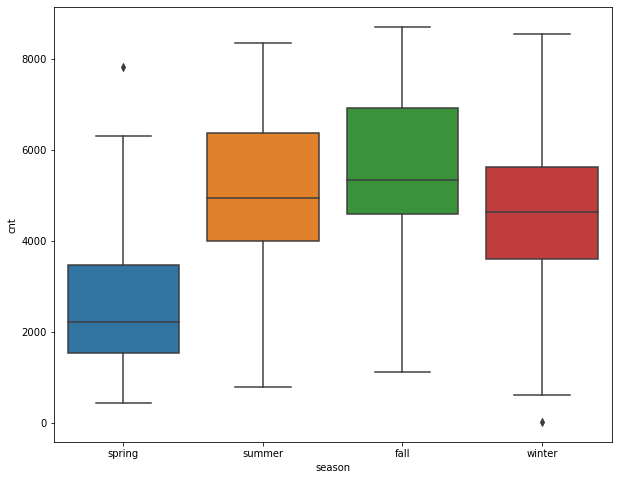

Observation:  Based on the plots # of bikes used is good in Summer, Winter and Fall, rather than Spring


In [10]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.show()

print("""Observation:  Based on the plots # of bikes used is good in Summer, Winter and Fall, rather than Spring""")

#### yr attribute

In [11]:
day.yr.value_counts()

day.groupby('yr').count()

day[['yr_readable']]=day[['yr']].apply(lambda x: x.map({0: 2018, 1: 2019}))
day.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_readable
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,2018
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510,2018
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959,2018
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822,2018
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,2018


In [12]:
day.groupby('yr')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
yr,,,,,,,,
0,365.0,3405.761644,1378.753666,431.0,2132.0,3740.0,4586.0,6043.0
1,365.0,5610.252055,1780.183449,22.0,4375.0,5936.0,7013.0,8714.0


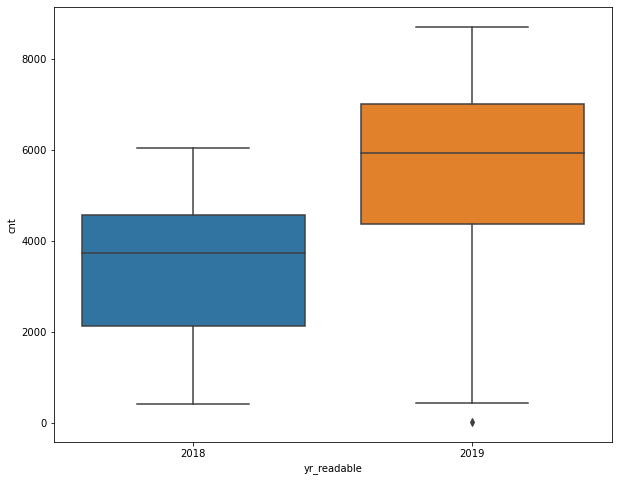

Obseravation: Usage of Bikes is more in 2019 year, rather than 2018


In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'yr_readable', y = 'cnt', data = day)
plt.show()

print("""Obseravation: Usage of Bikes is more in 2019 year, rather than 2018""")

In [14]:
## This is duplicate data, hence dropped.
day=day.drop(['yr_readable'], axis=1)

#### mnth attribute

In [15]:
day.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [16]:
day.groupby('mnth')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
mnth,,,,,,,,
1,62.0,2176.338710,1161.674370,431.0,1251.75,1939.0,3235.75,4521.0
2,56.0,2669.964286,1150.264854,1005.0,1618.50,2438.5,3778.75,5062.0
3,62.0,3692.258065,1899.301812,605.0,2077.00,3216.5,5361.00,8362.0
4,60.0,4484.900000,1776.160778,795.0,3188.25,4293.5,6205.25,7460.0
5,62.0,5349.774194,1298.711561,2633.0,4409.00,4890.5,6405.50,8294.0
6,60.0,5772.366667,1240.400031,3767.0,4834.50,5308.5,6983.00,8120.0
7,62.0,5563.677419,1273.751871,3285.0,4491.50,5446.5,6678.75,8173.0
8,62.0,5664.419355,1494.516146,1115.0,4582.50,5229.5,7121.00,7865.0
9,60.0,5766.516667,1810.130649,1842.0,4532.00,5384.0,7509.25,8714.0


In [17]:
day[['mnth']]=day[['mnth']].apply(lambda x: 
                                        x.map({1:"January",2:"February",3:"March",4:"April",5:"May",
                                               6:"June",7:"July", 8:"August", 9:"September", 10:"October",
                                              11:"November", 12:"December"}))
day.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,January,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,January,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,January,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,January,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,January,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


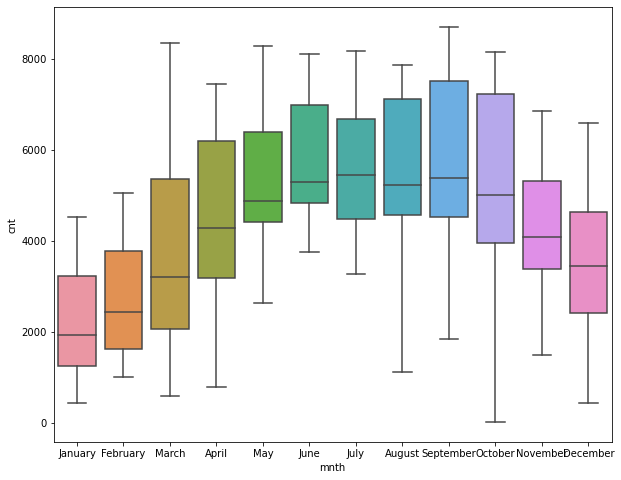

 Observation: From the month May to October, there is a good trend of sharing bikes


In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.show()

print(""" Observation: From the month May to October, there is a good trend of sharing bikes""")

#### holiday attribute

In [19]:
day.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [20]:
day.groupby('holiday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,709.0,4530.90268,1927.71680,22.0,3214.0,4563.0,5936.0,8714.0
1,21.0,3735.00000,2103.35066,1000.0,1951.0,3351.0,6034.0,7403.0


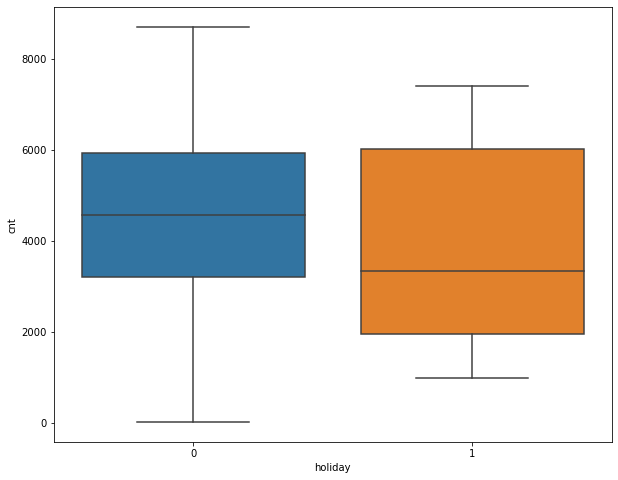

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.show()

#### weekday attribute

In [22]:
day.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [23]:
day.groupby('weekday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
0,105.0,4228.828571,1872.496629,605.0,2918.00,4334.0,5464.0,8227.0
1,105.0,4338.123810,1793.074013,22.0,3310.00,4359.0,5875.0,7525.0
2,104.0,4510.663462,1826.911642,683.0,3579.25,4576.5,5769.0,7767.0
3,103.0,4574.893204,2030.176095,441.0,2731.00,4656.0,6182.5,8173.0
4,104.0,4667.259615,1939.433317,431.0,3270.75,4721.0,6286.0,7804.0
5,104.0,4690.288462,1874.624870,1167.0,3390.75,4601.5,5900.5,8362.0
6,105.0,4550.542857,2196.693009,627.0,2732.00,4521.0,6140.0,8714.0


In [24]:
day[['weekday']]=day[['weekday']].apply(lambda x: 
                                        x.map({0:"Tuesday",1:"Wednesday",2:"Thursday",3:"Friday",4:"Saturday",
                                               5:"Sunday",6:"Monday"}))
day.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,January,0,Saturday,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,January,0,Sunday,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,January,0,Monday,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,January,0,Tuesday,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,January,0,Wednesday,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


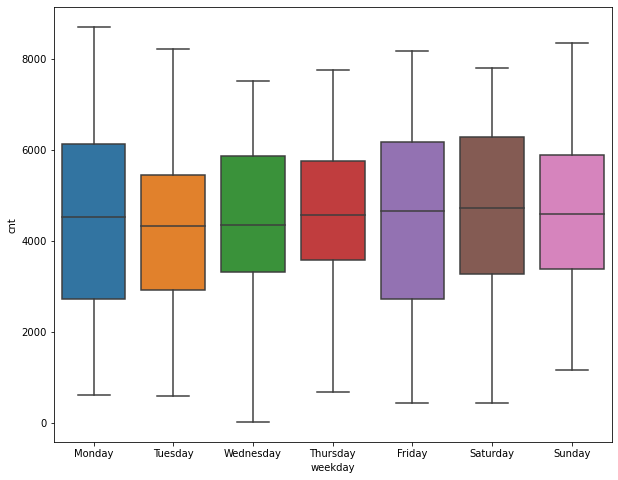

Observation: Weekdays has the same or nearly same median, so the trend is good along the week. And still analysis is required on season and other variables


In [25]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.show()

print("""Observation: Weekdays has the same or nearly same median, so the trend is good along the week. And still analysis is required on season and other variables""")

#### workingday attribute

In [26]:
day.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [27]:
day.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.5,4459.0,5907.5,8714.0
1,499.0,4590.332665,1876.247607,22.0,3362.0,4585.0,5989.0,8362.0


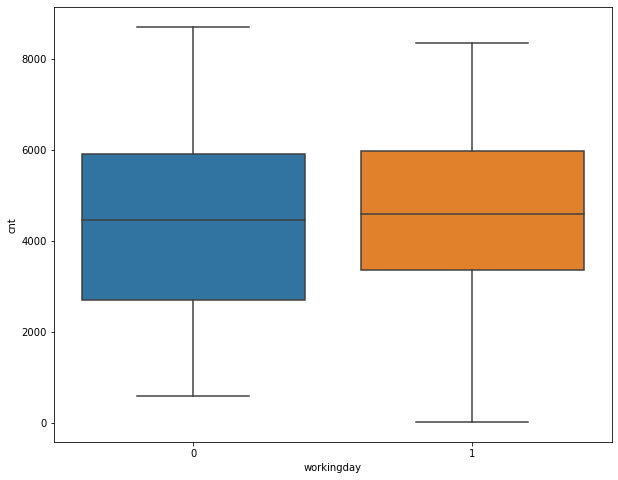

Observation: ay is neither weekend nor holiday is 1 and Weekdays is 0, and both are having same median with respect to the bike shared on cnt variable


In [28]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()

print("""Observation: ay is neither weekend nor holiday is 1 and Weekdays is 0, and both are having same median with respect to the bike shared on cnt variable""")

#### weathersit attribute

In [29]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [30]:
day.groupby('weathersit')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.50,8714.0
2,246.0,4044.813008,1807.309708,605.0,2699.0,4043.0,5258.75,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.00,4639.0


In [31]:
day[['weathersit']]=day[['weathersit']].apply(lambda x: 
                                        x.map({3:"Light_Snow_Rain_Thunder_Scattered",1:"Partly_Few_Cloudy_Clear",2:"Mist_Broken_Few_Cloudy"
                                               }))

day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Monday,0,Mist_Broken_Few_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,Tuesday,0,Mist_Broken_Few_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,Wednesday,1,Partly_Few_Cloudy_Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Thursday,1,Partly_Few_Cloudy_Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Friday,1,Partly_Few_Cloudy_Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


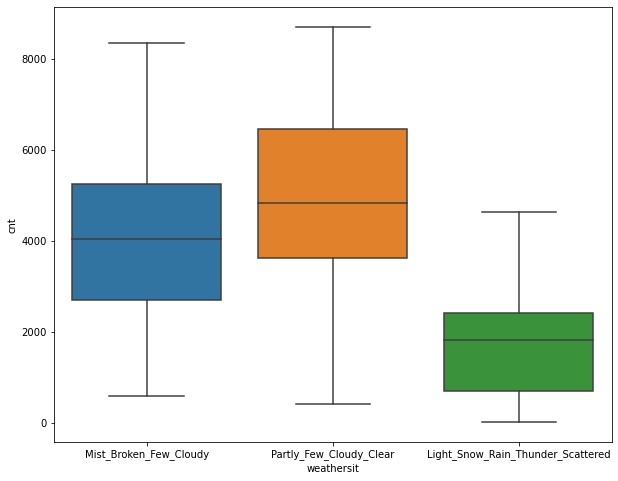

Observation: Except on the Light Snow Rain Thunder, other weather trends are good


In [32]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

print("""Observation: Except on the Light Snow Rain Thunder, other weather trends are good""")

#### temp and atemp attributes

In [33]:
day.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [34]:
day.groupby('temp')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp,,,,,,,,
2.424346,1.0,981.0,NaN,981.0,981.0,981.0,981.0,981.0
3.957390,1.0,986.0,NaN,986.0,986.0,986.0,986.0,986.0
3.993043,1.0,1416.0,NaN,1416.0,1416.0,1416.0,1416.0,1416.0
4.407500,1.0,2368.0,NaN,2368.0,2368.0,2368.0,2368.0,2368.0
5.227500,1.0,1529.0,NaN,1529.0,1529.0,1529.0,1529.0,1529.0
...,...,...,...,...,...,...,...,...
34.200847,1.0,5463.0,NaN,5463.0,5463.0,5463.0,5463.0,5463.0
34.371653,1.0,3846.0,NaN,3846.0,3846.0,3846.0,3846.0,3846.0
34.781653,1.0,3387.0,NaN,3387.0,3387.0,3387.0,3387.0,3387.0


<AxesSubplot:xlabel='temp', ylabel='Density'>

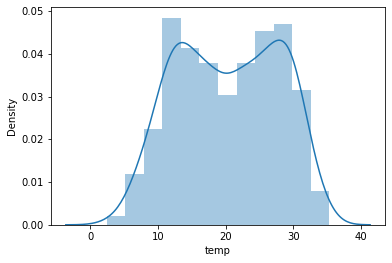

In [35]:
sns.distplot(day.temp)

<AxesSubplot:xlabel='atemp', ylabel='Density'>

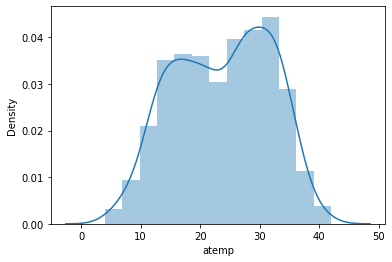

In [36]:
sns.distplot(day.atemp)

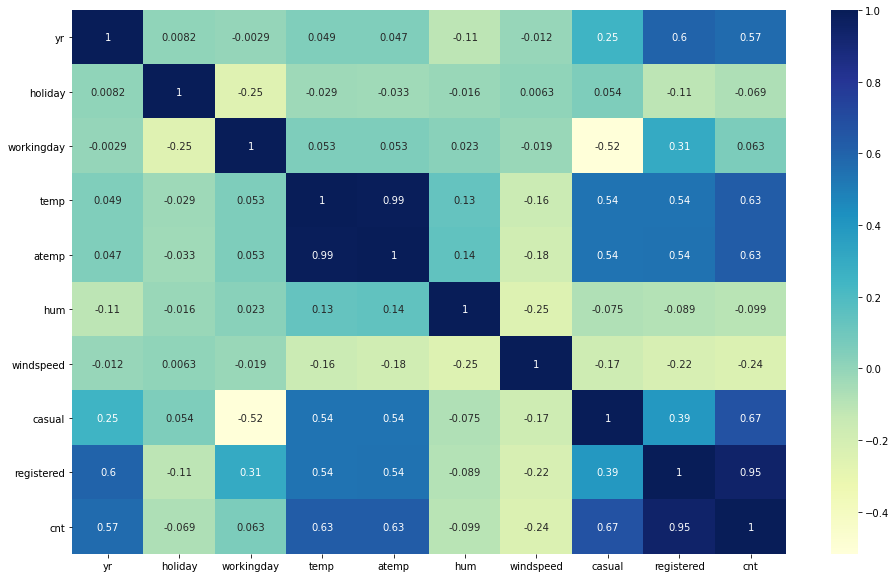

correlation between temp and atemp is 0.99 which is almost 1


In [37]:
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

print("""correlation between temp and atemp is 0.99 which is almost 1""")

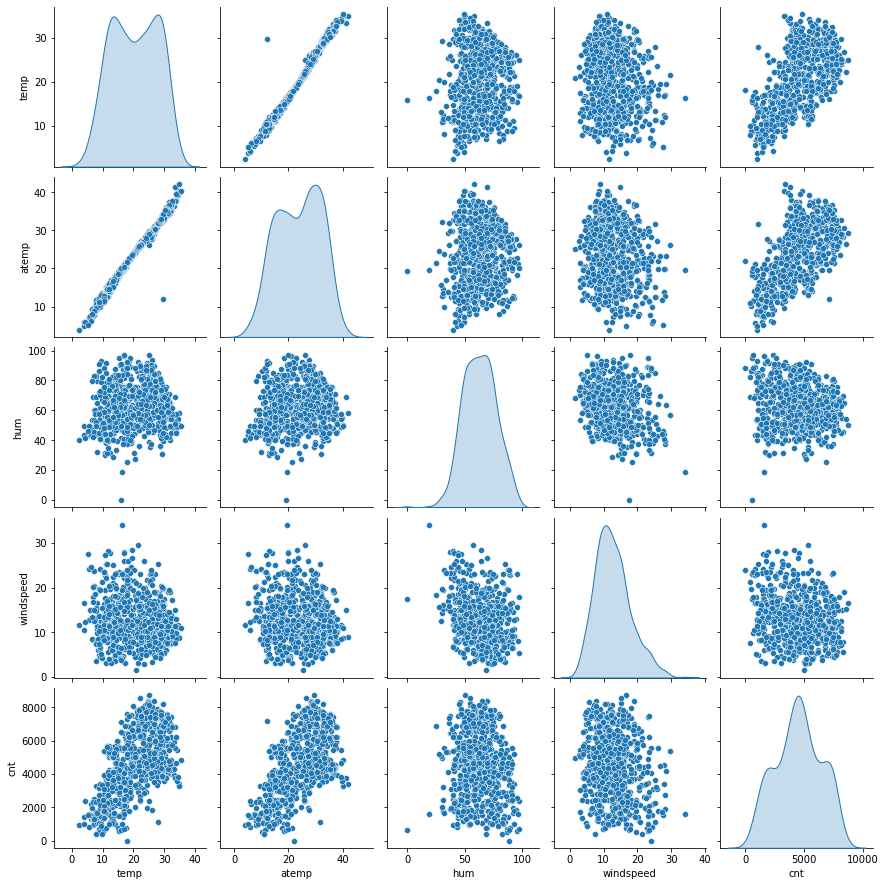

By the above plot, hum and windspeed are not linear with the "cnt" target variable


In [38]:
sns.pairplot(day[['temp','atemp','hum','windspeed','cnt']], diag_kind='kde')
plt.show()

print("""By the above plot, hum and windspeed are not linear with the "cnt" target variable""")

In [39]:
## Multicollinearity on temp and atemp attributes, since we can remove temp.

# day = day.drop(['temp'], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Monday,0,Mist_Broken_Few_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,Tuesday,0,Mist_Broken_Few_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,Wednesday,1,Partly_Few_Cloudy_Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Thursday,1,Partly_Few_Cloudy_Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Friday,1,Partly_Few_Cloudy_Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### casual and registered attributes

In [40]:
day.groupby('casual')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
casual,,,,,,,,
2,1.0,22.0,NaN,22.0,22.0,22.0,22.0,22.0
9,2.0,562.0,171.119841,441.0,501.5,562.0,622.5,683.0
15,1.0,431.0,NaN,431.0,431.0,431.0,431.0,431.0
25,1.0,1162.0,NaN,1162.0,1162.0,1162.0,1162.0,1162.0
34,1.0,506.0,NaN,506.0,506.0,506.0,506.0,506.0
...,...,...,...,...,...,...,...,...
3155,1.0,7836.0,NaN,7836.0,7836.0,7836.0,7836.0,7836.0
3160,1.0,8714.0,NaN,8714.0,8714.0,8714.0,8714.0,8714.0
3252,1.0,6857.0,NaN,6857.0,6857.0,6857.0,6857.0,6857.0


Based on the below comment from model building 

"Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable."

We can drop the casual and registered attributes.

In [41]:
print("""Based on the below comment from model building
Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.
We can drop the casual and registered attributes.""")

day=day.drop(['casual','registered'], axis=1)

Based on the below comment from model building
Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.
We can drop the casual and registered attributes.


# 2: Preparing the Data for Modelling

### Dummy Variables

The variable `season` has four levels.
The variable `weathersit` has three levels.
The variable `weekday` has seven levels.
The variable `mnth` has 12 levels.

For this, we will use something called `dummy variables` pd.get_dummies from pandas.

In [42]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_four'

season_four=pd.get_dummies(day['season'],drop_first=True)

In [43]:
weathersit_three=pd.get_dummies(day['weathersit'],drop_first=True)

In [44]:
weekday_seven=pd.get_dummies(day['weekday'],drop_first=True)

In [45]:
mnth_twelve=pd.get_dummies(day['mnth'],drop_first=True)

#### Add the created dummy variable using concat from pandas to the original day dataframe

In [46]:
day = pd.concat([day, season_four], axis = 1)

In [47]:
day = pd.concat([day, weathersit_three], axis = 1)

In [48]:
day = pd.concat([day, weekday_seven], axis = 1)

In [49]:
day = pd.concat([day, mnth_twelve], axis = 1)

#### Drop Original attributes, since we have created the dummies for it

In [50]:
day.drop(['season'],axis=1,inplace=True)

In [51]:
day.drop(['weekday'],axis=1,inplace=True)

In [52]:
day.drop(['weathersit'],axis=1,inplace=True)

In [53]:
day.drop(['mnth'],axis=1,inplace=True)

In [54]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   atemp                    730 non-null    float64
 5   hum                      730 non-null    float64
 6   windspeed                730 non-null    float64
 7   cnt                      730 non-null    int64  
 8   spring                   730 non-null    uint8  
 9   summer                   730 non-null    uint8  
 10  winter                   730 non-null    uint8  
 11  Mist_Broken_Few_Cloudy   730 non-null    uint8  
 12  Partly_Few_Cloudy_Clear  730 non-null    uint8  
 13  Monday                   730 non-null    uint8  
 14  Saturday                 7

# 3: Splitting the Data into Training and Testing Sets


As you know, the first basic step for regression is performing a train-test split.

In [55]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [56]:
day_train.shape

(510, 30)

In [57]:
day_test.shape

(219, 30)

In [58]:
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,0


### Rescaling the Features 

Any model we are building, if the coefficients are interpreted, it is exteremely import to keep all the variables in comaprable scale. Thats the idea of performing Rescaling of variables.

1. Min-Max scaling: Normalisation (Between 0 to 1)    (x - xmin)/(xmax-xmin)
2. Standardisation (mean-0, sigma-1)  (x - mean)/sigma(SD)

This time, we will use MinMax scaling.

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt']

day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

In [62]:
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


In [63]:
day_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,7.431169,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
#CREATING X-train AND y-train
y_train = day_train.pop('cnt')
X_train = day_train

In [65]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# 4: Building a Linear Model

In [67]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', False, 10),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Mist_Broken_Few_Cloudy', True, 1),
 ('Partly_Few_Cloudy_Clear', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 13),
 ('Sunday', False, 11),
 ('Thursday', False, 9),
 ('Tuesday', False, 7),
 ('Wednesday', False, 8),
 ('August', False, 6),
 ('December', True, 1),
 ('February', False, 3),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 4),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1)]

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'Mist_Broken_Few_Cloudy', 'Partly_Few_Cloudy_Clear', 'Monday',
       'December', 'January', 'July', 'November', 'September'],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'summer', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'August', 'February', 'June', 'March', 'May',
       'October'],
      dtype='object')

In [71]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [72]:
X_train_rfe

,yr,holiday,atemp,hum,windspeed,spring,winter,Mist_Broken_Few_Cloudy,Partly_Few_Cloudy_Clear,Monday,December,January,July,November,September
653,1,0,0.501133,0.575354,0.300794,0,1,0,1,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,1,0,1,0,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,1,0,0,1,0,1,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.762183,0.605840,0.355596,0,0,1,0,0,0,0,0,0,0
578,1,0,0.824359,0.679690,0.187140,0,0,0,1,0,0,0,0,0,0
53,0,0,0.218747,0.435939,0.111379,1,0,0,1,0,0,0,0,0,0
350,0,0,0.223544,0.577930,0.431816,0,1,1,0,1,1,0,0,0,0


In [73]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

MLR_1 = sm.OLS(y_train, X_train_lm).fit()

MLR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          9.67e-187
Time:                        18:53:21   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1158      0.045      2.544      0.011       0.026       0.205
yr                          0.2326      0.008     28.490      0.000       0.217       0.249
holiday                    -0.0841      0.026     -3.243      0.001      -0.135      -0.033
atemp                       0.4470      0.035     12.826      0.000       0.379       0.515
hum                        -0.1477      0.038     -3.874      0.000      -0.223      -0.073
windspeed                  -0.1692      0.026     -6.498      0.000      -0.220      -0.118
spring                     -0.1070      0.015     -6.974      0.000      -0.137      -0.077
winter                      0.0662      0.014      4.703      0.000       0.039       0.094
Mist_Broken_Few_Cloudy      0.1922      0.025      7.610      0.000       0.143       0.242
Partly_Few_Cloudy_Clear     0.2504      0.027      9.381      0.000       0.198       0.303
Monday                      0.0182      0.011      1.627      0.104      -0.004       0.040
December                   -0.0485      0.017     -2.791      0.005      -0.083      -0.014
January                    -0.0515      0.018     -2.836      0.005      -0.087      -0.016
July                       -0.0679      0.017     -3.935      0.000      -0.102      -0.034
November                   -0.0502      0.019     -2.689      0.007      -0.087      -0.014
September                   0.0586      0.016      3.751      0.000       0.028       0.089
==============================================================================
Omnibus:                       73.887   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.568
Skew:                          -0.724   Prob(JB):                     9.28e-43
Kurtosis:                       5.648   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

The basic algorithm, we follow for in model building is like keep on adding variables, or performing the RFE (Recursive Feature Elimination) and using the variables from the RFE.

We have to look into two things:

1) Statistical significance of variables

2) VIF (If the variable is correlate to any of the other variable.

The higher a variable is related to all other variables, the higher the VIF could be.

Maybe we could drop some attributes based on below format:

High P-Value, High VIF

High-Low:

   - High P, Low VIF --> remove these first
   
   - Low P, High VIF --> Remove these after the ones above
   
Low P, Low VIF


In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.33
2,atemp,21.50
8,Partly_Few_Cloudy_Clear,13.26
7,Mist_Broken_Few_Cloudy,8.43
4,windspeed,4.32
5,spring,3.28
6,winter,2.97
0,yr,2.08
13,November,1.86
11,January,1.79


In [76]:
## Dropping hum attribute due to High VIF value.

X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [77]:
X_train_lm = sm.add_constant(X_train_rfe)

MLR_2 = sm.OLS(y_train, X_train_lm).fit()

MLR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          1.10e-184
Time:                        18:53:21   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0015      0.034     -0.044      0.965      -0.069       0.066
yr                          0.2362      0.008     28.711      0.000       0.220       0.252
holiday                    -0.0847      0.026     -3.222      0.001      -0.136      -0.033
atemp                       0.4125      0.034     12.073      0.000       0.345       0.480
windspeed                  -0.1441      0.026     -5.636      0.000      -0.194      -0.094
spring                     -0.1096      0.016     -7.050      0.000      -0.140      -0.079
winter                      0.0577      0.014      4.095      0.000       0.030       0.085
Mist_Broken_Few_Cloudy      0.2099      0.025      8.333      0.000       0.160       0.259
Partly_Few_Cloudy_Clear     0.2917      0.025     11.756      0.000       0.243       0.340
Monday                      0.0205      0.011      1.814      0.070      -0.002       0.043
December                   -0.0541      0.018     -3.083      0.002      -0.089      -0.020
January                    -0.0568      0.018     -3.090      0.002      -0.093      -0.021
July                       -0.0603      0.017     -3.471      0.001      -0.094      -0.026
November                   -0.0497      0.019     -2.624      0.009      -0.087      -0.012
September                   0.0553      0.016      3.501      0.001       0.024       0.086
==============================================================================
Omnibus:                       77.462   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.699
Skew:                          -0.762   Prob(JB):                     2.62e-44
Kurtosis:                       5.669   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
## Calculate VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,13.56
7,Partly_Few_Cloudy_Clear,12.93
6,Mist_Broken_Few_Cloudy,7.15
3,windspeed,4.28
4,spring,2.95
5,winter,2.59
0,yr,2.07
12,November,1.85
10,January,1.74
9,December,1.54


In [79]:
## Dropping atemp attribute due to High VIF value.

X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [80]:
X_train_lm = sm.add_constant(X_train_rfe)

MLR_3 = sm.OLS(y_train, X_train_lm).fit()

MLR_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.8
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          3.50e-158
Time:                        18:53:21   Log-Likelihood:                 435.40
No. Observations:                 510   AIC:                            -842.8
Df Residuals:                     496   BIC:                            -783.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2533      0.031      8.187      0.000       0.192       0.314
yr                          0.2466      0.009     26.525      0.000       0.228       0.265
holiday                    -0.0829      0.030     -2.771      0.006      -0.142      -0.024
windspeed                  -0.2062      0.028     -7.243      0.000      -0.262      -0.150
spring                     -0.2169      0.014    -14.968      0.000      -0.245      -0.188
winter                      0.0069      0.015      0.453      0.650      -0.023       0.037
Mist_Broken_Few_Cloudy      0.2225      0.029      7.781      0.000       0.166       0.279
Partly_Few_Cloudy_Clear     0.3124      0.028     11.104      0.000       0.257       0.368
Monday                      0.0187      0.013      1.454      0.147      -0.007       0.044
December                   -0.1087      0.019     -5.636      0.000      -0.147      -0.071
January                    -0.1213      0.020     -6.072      0.000      -0.161      -0.082
July                        0.0129      0.019      0.697      0.486      -0.023       0.049
November                   -0.0968      0.021     -4.599      0.000      -0.138      -0.055
September                   0.0784      0.018      4.396      0.000       0.043       0.113
==============================================================================
Omnibus:                       60.468   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.321
Skew:                          -0.669   Prob(JB):                     3.71e-28
Kurtosis:                       5.038   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
## Calculate VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Partly_Few_Cloudy_Clear,4.39
2,windspeed,4.25
5,Mist_Broken_Few_Cloudy,2.79
4,winter,2.56
3,spring,2.36
0,yr,2.03
11,November,1.78
9,January,1.65
8,December,1.46
10,July,1.20


In [82]:
## Dropping winter attribute due to High P value 0.650

X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [83]:
X_train_lm = sm.add_constant(X_train_rfe)

MLR_4 = sm.OLS(y_train, X_train_lm).fit()

MLR_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     154.9
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          3.05e-159
Time:                        18:53:21   Log-Likelihood:                 435.29
No. Observations:                 510   AIC:                            -844.6
Df Residuals:                     497   BIC:                            -789.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2566      0.030      8.553      0.000       0.198       0.316
yr                          0.2466      0.009     26.546      0.000       0.228       0.265
holiday                    -0.0828      0.030     -2.773      0.006      -0.142      -0.024
windspeed                  -0.2070      0.028     -7.286      0.000      -0.263      -0.151
spring                     -0.2190      0.014    -15.939      0.000      -0.246      -0.192
Mist_Broken_Few_Cloudy      0.2209      0.028      7.792      0.000       0.165       0.277
Partly_Few_Cloudy_Clear     0.3107      0.028     11.156      0.000       0.256       0.365
Monday                      0.0188      0.013      1.464      0.144      -0.006       0.044
December                   -0.1047      0.017     -6.091      0.000      -0.138      -0.071
January                    -0.1207      0.020     -6.060      0.000      -0.160      -0.082
July                        0.0114      0.018      0.626      0.532      -0.024       0.047
November                   -0.0914      0.017     -5.277      0.000      -0.125      -0.057
September                   0.0783      0.018      4.396      0.000       0.043       0.113
==============================================================================
Omnibus:                       59.031   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.965
Skew:                          -0.661   Prob(JB):                     5.40e-27
Kurtosis:                       4.986   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
## Calculate VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.25
5,Partly_Few_Cloudy_Clear,4.24
4,Mist_Broken_Few_Cloudy,2.69
3,spring,2.15
0,yr,2.03
8,January,1.64
10,November,1.20
6,Monday,1.19
9,July,1.17
11,September,1.17


In [85]:
## Dropping Saturday attribute due to High P value 0.144

X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [86]:
X_train_lm = sm.add_constant(X_train_rfe)

MLR_5 = sm.OLS(y_train, X_train_lm).fit()

MLR_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.4
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          6.64e-160
Time:                        18:53:21   Log-Likelihood:                 434.19
No. Observations:                 510   AIC:                            -844.4
Df Residuals:                     498   BIC:                            -793.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2595      0.030      8.658      0.000       0.201       0.318
yr                          0.2462      0.009     26.483      0.000       0.228       0.264
holiday                    -0.0859      0.030     -2.880      0.004      -0.145      -0.027
windspeed                  -0.2048      0.028     -7.211      0.000      -0.261      -0.149
spring                     -0.2189      0.014    -15.917      0.000      -0.246      -0.192
Mist_Broken_Few_Cloudy      0.2204      0.028      7.765      0.000       0.165       0.276
Partly_Few_Cloudy_Clear     0.3100      0.028     11.122      0.000       0.255       0.365
December                   -0.1034      0.017     -6.018      0.000      -0.137      -0.070
January                    -0.1200      0.020     -6.022      0.000      -0.159      -0.081
July                        0.0117      0.018      0.640      0.522      -0.024       0.047
November                   -0.0913      0.017     -5.269      0.000      -0.125      -0.057
September                   0.0786      0.018      4.406      0.000       0.044       0.114
==============================================================================
Omnibus:                       56.073   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.305
Skew:                          -0.619   Prob(JB):                     1.24e-26
Kurtosis:                       5.021   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
## Calculate VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.22
5,Partly_Few_Cloudy_Clear,4.20
4,Mist_Broken_Few_Cloudy,2.66
3,spring,2.15
0,yr,2.03
7,January,1.64
9,November,1.20
8,July,1.17
10,September,1.17
6,December,1.15


In [88]:
## Dropping July attribute due to High P value 0.522

X_train_rfe=X_train_rfe.drop(['July'],axis=1)

In [89]:
X_train_lm = sm.add_constant(X_train_rfe)

MLR_6 = sm.OLS(y_train, X_train_lm).fit()

MLR_6.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          5.82e-161
Time:                        18:53:21   Log-Likelihood:                 433.99
No. Observations:                 510   AIC:                            -846.0
Df Residuals:                     499   BIC:                            -799.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2616      0.030      8.780      0.000       0.203       0.320
yr                          0.2462      0.009     26.500      0.000       0.228       0.264
holiday                    -0.0862      0.030     -2.892      0.004      -0.145      -0.028
windspeed                  -0.2062      0.028     -7.287      0.000      -0.262      -0.151
spring                     -0.2202      0.014    -16.201      0.000      -0.247      -0.194
Mist_Broken_Few_Cloudy      0.2200      0.028      7.757      0.000       0.164       0.276
Partly_Few_Cloudy_Clear     0.3103      0.028     11.140      0.000       0.256       0.365
December                   -0.1047      0.017     -6.132      0.000      -0.138      -0.071
January                    -0.1203      0.020     -6.037      0.000      -0.159      -0.081
November                   -0.0929      0.017     -5.419      0.000      -0.127      -0.059
September                   0.0770      0.018      4.362      0.000       0.042       0.112
==============================================================================
Omnibus:                       56.606   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.699
Skew:                          -0.624   Prob(JB):                     6.17e-27
Kurtosis:                       5.031   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
## Calculate VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.21
5,Partly_Few_Cloudy_Clear,3.91
4,Mist_Broken_Few_Cloudy,2.59
3,spring,2.10
0,yr,2.03
7,January,1.64
8,November,1.17
9,September,1.15
6,December,1.14
1,holiday,1.06


## The equation of best fitted surface based on model MLR_6:

cnt = 0.2616 + (**yr** × 0.2462) - (**holiday** × 0.0862) - (**windspeed** × 0.2062) − (**spring** × 0.2202) + (**Mist_Broken_Few_Cloudy** × 0.2200) + (**Partly_Few_Cloudy_Clear** ×0.3103) - (**December** × 0.1047) -(**January** ×0.1203) − (**November** × 0.0929) + (**September** × 0.0770)



- F-statistic: 185.4
- Prob (F-statistic): 5.82e-161

The F-Statistics value of 185.4 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

# 5: Residuals Analysis

In [91]:
y_train_cnt = MLR_6.predict(X_train_lm)

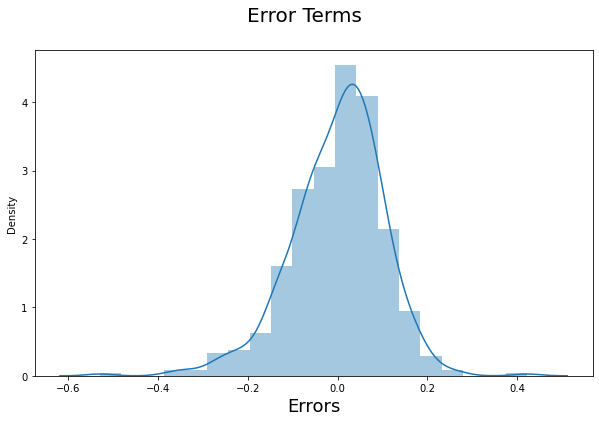

In [92]:
res = y_train-y_train_cnt
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,6))
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    
plt.show()

#### Observation: From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [93]:
## Calculate VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
2,windspeed,4.21
5,Partly_Few_Cloudy_Clear,3.91
4,Mist_Broken_Few_Cloudy,2.59
3,spring,2.10
0,yr,2.03
7,January,1.64
8,November,1.17
9,September,1.15
6,December,1.14
1,holiday,1.06


#### Observation: From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# 6: Predictions and Evaluation of the test set

In [94]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt']

day_test[num_vars] = scaler.transform(day_test[num_vars])

In [95]:
day_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
184,0,1,0,29.793347,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [96]:
day_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,December,February,January,July,June,March,May,November,October,September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.815737,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,7.689600,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,3.957390,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
#CREATING X-test AND y-test
y_test = day_test.pop('cnt')
X_test = day_test

In [98]:
X_test_lm = sm.add_constant(X_test)
X_test_lm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,December,February,January,July,June,March,May,November,October,September
184,1.0,0,1,0,29.793347,0.769660,0.657364,0.084219,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,1,32.082500,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,19.270000,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,31.433347,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,29.315000,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,1,0,0,0,0,0


In [99]:
# Drop attributes from X_test_lm, and make sync with the model we are predicting

X_test_lm= X_test_lm.drop(['atemp','hum','Saturday','July','workingday', 'temp', 'summer', 'Monday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'August', 'February', 'June', 'March','winter','May',
       'October'], axis=1)

In [100]:
# Predict the model on test

y_test_pred = MLR_6.predict(X_test_lm)

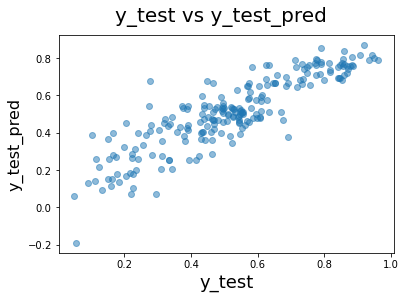

In [101]:
# MODEL EVALUATION
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [102]:
# Evaluate the model using Rsquare
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.7692911456361963

In [103]:
# Calculating Adjusted R-Square

r2=0.7692911456361963

# n is number of rows in X

n = X_test_lm.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_lm.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7570312548245932

## Final Result Comparison
- Train R^2 :0.788
- Train Adjusted R^2 :0.784
- Test R^2 :0.769
- Test Adjusted R^2 :0.757

This seems to be a really good model that can very well 'Generalize' various datasets.

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Partly_Few_Cloudy_Clear** - A coefficient value of ‘’ indicated that a unit increase in Partly_Few_Cloudy_Clear variable increases the bike hire numbers by  units. 
- **Mist_Broken_Few_Cloudy** - A coefficient value of ‘0.2200’ indicated that, w.r.t Mist_Broken_Few_Cloudy, a unit increase in Mist_Broken_Few_Cloudy variable increase the bike hire numbers by 0.3070 units.
- **Year (yr)** - A coefficient value of ‘0.2462’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2462 units. 

One more consideration is:

Demands increases in the month of September.
